In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
path = "/content/final.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,tweet,hashtag,new_tweets,str_processed_tweets,label
0,1,8036,get vaccinated! #vaccineswork \n,['vaccineswork'],"['vaccin', 'vaccin', 'work']",get vaccinated vaccine work,1
1,2,7705,join us for a webinar on strategic engagement ...,['vaccineswork'],"['join', 'webinar', 'strateg', 'engag', 'relig...",join u webinar strategic engagement religious ...,1
2,4,5239,anyone else have a doctor who is a pro-vaccine...,"['vaccinesdontwork', 'covidvaccine']","['doctor', 'vaccin', 'democrat', 'refus', 'res...",anyone else doctor pro vaccine democrat refuse...,0
3,6,4453,yet another #democratswarn alert.\nshe's admit...,"['democratswarn', 'stopthespread', 'vaccinesdo...","['democrat', 'warn', 'alert', 'admit', 'intent...",yet another democrat warn alert admitting inte...,0
4,7,4828,update: many public events now requiring the v...,"['vaccinebust', 'vaccinesdontwork', 'vaccine']","['updat', 'public', 'event', 'requir', 'vaccin...",update many public event requiring vaccinated ...,0


In [ ]:
df['label'].value_counts()

1    1470
0    1394
Name: label, dtype: int64

In [ ]:
##issues with range [-1, +1] with cross entropy loss function, unable to use tanh since keras uses binary cross entropy
##convert range back to [0, 1] w/ threshold as 0.5

df.loc[df['label'] == -1, 'label'] = 0

In [ ]:
df['label'].value_counts()

1    1470
0    1394
Name: label, dtype: int64

In [ ]:
sentences = df['str_processed_tweets'].values
y = df['label'].values

In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 2), binary=True)
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8100558659217877


In [ ]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2338900   
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,339,921
Trainable params: 2,339,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=50)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 100), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


43/43 [==============================] - 2s 36ms/step - loss: 0.5428 - accuracy: 0.7607 - val_loss: 0.4375 - val_accuracy: 0.8226
Epoch 2/20
43/43 [==============================] - 1s 31ms/step - loss: 0.2056 - accuracy: 0.9269 - val_loss: 0.4610 - val_accuracy: 0.8254
Epoch 3/20
43/43 [==============================] - 1s 31ms/step - loss: 0.1202 - accuracy: 0.9595 - val_loss: 0.5098 - val_accuracy: 0.8128
Epoch 4/20
43/43 [==============================] - 1s 31ms/step - loss: 0.1042 - accuracy: 0.9590 - val_loss: 0.5390 - val_accuracy: 0.8115
Epoch 5/20
43/43 [==============================] - 2s 36ms/step - loss: 0.0882 - accuracy: 0.9637 - val_loss: 0.5636 - val_accuracy: 0.8115
Epoch 6/20
43/43 [==============================] - 1s 32ms/step - loss: 0.0819 - accuracy: 0.9660 - val_loss: 0.6117 - val_accuracy: 0.7975
Epoch 7/20
43/43 [==============================] - 1s 34ms/step - loss: 0.0817 - accuracy: 0.9660 - val_loss: 0.6088 - val_accuracy: 0.8017
Epoch 8/20
43/43 [======

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9702
Testing Accuracy:  0.7905


In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

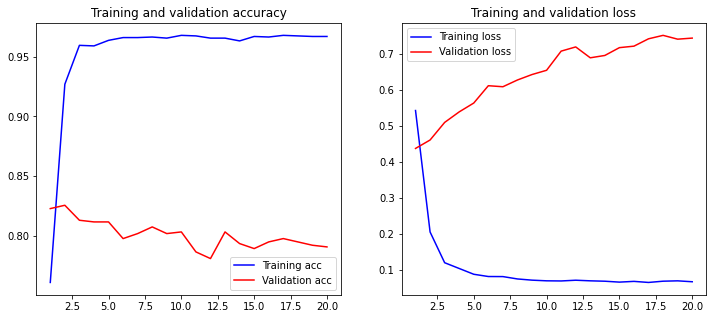

In [ ]:
plot_history(history)

In [ ]:
#word embeddings

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

pretty clear case getting vaccinated ever saw one whatever bamfs tell do vaccine work
[974, 975, 39, 56, 3, 88, 1588, 42, 976, 2497, 119, 15, 1, 2]


In [ ]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           279300    
                                                                 
 flatten_1 (Flatten)         (None, 5000)              0         
                                                                 
 dense_5 (Dense)             (None, 100)               500100    
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 780,421
Trainable params: 780,421
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
43/43 [==============================] - 1s 18ms/step - loss: 0.6900 - accuracy: 0.5256 - val_loss: 0.6785 - val_accuracy: 0.5866
Epoch 2/20
43/43 [==============================] - 1s 14ms/step - loss: 0.6321 - accuracy: 0.6844 - val_loss: 0.5833 - val_accuracy: 0.7193
Epoch 3/20
43/43 [==============================] - 1s 15ms/step - loss: 0.4258 - accuracy: 0.8496 - val_loss: 0.4789 - val_accuracy: 0.7905
Epoch 4/20
43/43 [==============================] - 1s 14ms/step - loss: 0.2596 - accuracy: 0.9060 - val_loss: 0.4983 - val_accuracy: 0.7737
Epoch 5/20
43/43 [==============================] - 1s 14ms/step - loss: 0.1773 - accuracy: 0.9367 - val_loss: 0.5065 - val_accuracy: 0.8017
Epoch 6/20
43/43 [==============================] - 1s 14ms/step - loss: 0.1332 - accuracy: 0.9516 - val_loss: 0.5269 - val_accuracy: 0.8017
Epoch 7/20
43/43 [==============================] - 1s 15ms/step - loss: 0.1169 - accuracy: 0.9539 - val_loss: 0.5865 - val_accuracy: 0.7346
Epoch 8/20
43

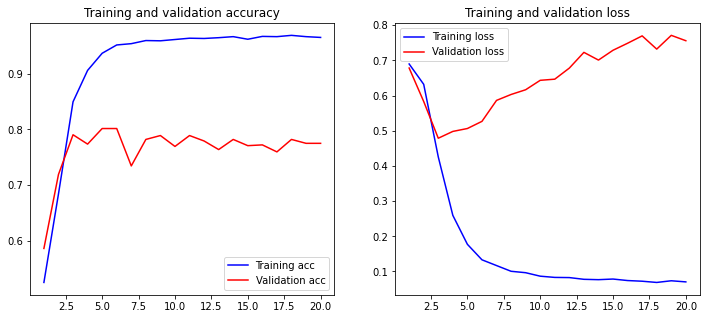

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
#Global max/average pooling takes the maximum/average of all features 

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           279300    
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_8 (Dense)             (None, 100)               5100      
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 285,421
Trainable params: 285,421
Non-trainable params: 0
________________________________________________

Training Accuracy: 0.9679
Testing Accuracy:  0.7849


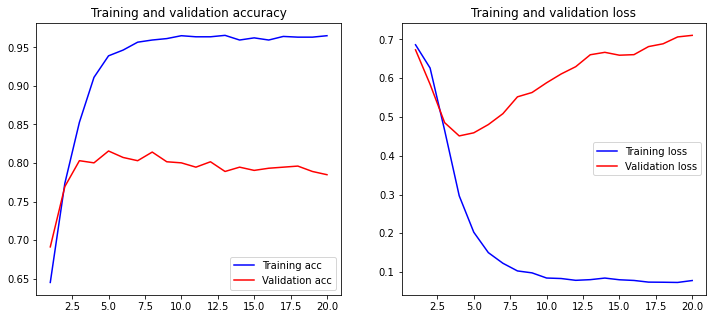

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
#lstm using GloVe Word Embeddings from stanford AI

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2022-04-23 18:49:06--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-23 18:49:07--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-23 18:49:07--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
word_index = tokenizer.word_index

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
MAX_SEQUENCE_LENGTH = 100
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)


In [ ]:
history = model.fit(X_train, y_train, batch_size=50, epochs=5,
                    validation_data=(X_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/5
43/43 [==============================] - 25s 411ms/step - loss: 0.6158 - accuracy: 0.6634 - val_loss: 0.5687 - val_accuracy: 0.7221 - lr: 0.0010
Epoch 2/5
43/43 [==============================] - 17s 402ms/step - loss: 0.5015 - accuracy: 0.7635 - val_loss: 0.4848 - val_accuracy: 0.7654 - lr: 0.0010
Epoch 3/5
43/43 [==============================] - 17s 395ms/step - loss: 0.4507 - accuracy: 0.7872 - val_loss: 0.4622 - val_accuracy: 0.7849 - lr: 0.0010
Epoch 4/5
43/43 [==============================] - 17s 394ms/step - loss: 0.4030 - accuracy: 0.8180 - val_loss: 0.4460 - val_accuracy: 0.8115 - lr: 0.0010
Epoch 5/5
43/43 [==============================] - 17s 393ms/step - loss: 0.3791 - accuracy: 0.8338 - val_loss: 0.4582 - val_accuracy: 0.8017 - lr: 0.0010


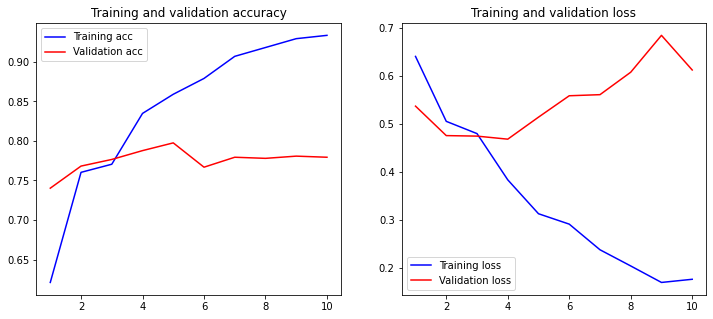

In [ ]:
plot_history(history)

In [ ]:
def decode_stance(stance):
  return "Pro-Vax" if score > 0.5 else "Anti-Vax"

#sequence = tokenizer.texts_to_sequences(['vaccines are good'])
#test = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)

#scores = model.predict(X_test, verbose=1)
#y_pred_1d = [decode_stance(score) for score in scores]

y_test2 = pd.Series(y_test)
y_test2.value_counts()

1    360
0    356
dtype: int64

In [ ]:
!pip install tensorflow_text
import tensorflow_text as text
import tensorflow_hub as hub

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

     |████████████████████████████████| 4.9 MB 6.7 MB/s 
     |████████████████████████████████| 462 kB 59.6 MB/s 


In [ ]:
X = df['str_processed_tweets'].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df['label'], test_size=0.2, random_state=10)

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
72/72 [==============================] - 1004s 14s/step - loss: 0.7227 - accuracy: 0.4906
Epoch 2/10
72/72 [==============================] - 1001s 14s/step - loss: 0.6964 - accuracy: 0.5373
Epoch 3/10
72/72 [==============================] - 1002s 14s/step - loss: 0.6809 - accuracy: 0.5661
Epoch 4/10
72/72 [==============================] - 1003s 14s/step - loss: 0.6716 - accuracy: 0.5836
Epoch 5/10
72/72 [==============================] - 1013s 14s/step - loss: 0.6622 - accuracy: 0.6037
Epoch 6/10
72/72 [==============================] - 1002s 14s/step - loss: 0.6503 - accuracy: 0.6194
Epoch 7/10
72/72 [==============================] - 1000s 14s/step - loss: 0.6388 - accuracy: 0.6408
Epoch 8/10
72/72 [==============================] - 998s 14s/step - loss: 0.6407 - accuracy: 0.6347
Epoch 9/10
72/72 [==============================] - 994s 14s/step - loss: 0.6306 - accuracy: 0.6526
Epoch 10/10
72/72 [==============================] - 996s 14s/step - loss: 0.6277 - accuracy:

In [ ]:
model.evaluate(X_test, y_test)

18/18 [==============================] - 250s 14s/step - loss: 0.6212 - accuracy: 0.6771


[0.6211675405502319, 0.6771378517150879]

In [ ]:
reviews = [
    'Vaccines are what save lives and people need to get vaccinated today',
    'vaccines kill people they do not work and people should have a choice and freedom',
    'there are side effects when you get vaccinated be careful',
    'antivaxxers are wrong go get your vaccine',
    "no forced vaccines my body my choice know the risk",
    "i am antivax",
    "vaccines are very good",
    "go get vaccinated today",
    "vaccines are bad and kill people harmful"
]
model.predict(reviews)

#this model does relatively well, next try more epochs, and maybe a hidden layer. 

array([[0.64152545],
       [0.48368296],
       [0.66150594],
       [0.76864743],
       [0.51113915],
       [0.37239996],
       [0.54835284],
       [0.72316456],
       [0.44841242]], dtype=float32)

In [ ]:
model.save("bert_vaccination_classifier", include_optimizer=True)

INFO:tensorflow:Assets written to: bert_vaccination_classifier/assets


INFO:tensorflow:Assets written to: bert_vaccination_classifier/assets


In [ ]:
!pip install bertopic
!pip install bertopic[visual]

from bertopic import BERTopic

model = BERTopic(verbose=True)
 
#convert to list 
docs = df['str_processed_tweets'].to_list()
 
topics, probabilities = model.fit_transform(docs)

     |████████████████████████████████| 57 kB 3.4 MB/s 
     |████████████████████████████████| 88 kB 4.2 MB/s 
     |████████████████████████████████| 79 kB 5.2 MB/s 
     |████████████████████████████████| 5.2 MB 21.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.0 MB 36.5 MB/s 
     |████████████████████████████████| 1.2 MB 46.8 MB/s 
     |████████████████████████████████| 77 kB 6.9 MB/s 
     |████████████████████████████████| 6.6 MB 49.1 MB/s 
     |████████████████████████████████| 895 kB 45.2 MB/s 
     |████████████████████████████████| 636 kB 47.8 MB/s 
     |████████████████████████████████| 1.1 MB 45.5 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330769 sha256=8be1407db5aada5395bc99c3c22decf22f74419e8a33a5b37f8d3f0278b001c0
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Batches:   0%|          | 0/90 [00:00<?, ?it/s]

2022-04-23 19:24:48,332 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-04-23 19:25:13,562 - BERTopic - Reduced dimensionality with UMAP
2022-04-23 19:25:13,726 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [ ]:
model.visualize_barchart()

#TOPIC 0: PRO-VACCINATION
#TOPIC 1: PRO-VACCINATION(MASKS)
#TOPIC 2: PRO-VACCINATION
#TOPIC 3: ANTI-VACCINATION
#TOPIC 4: ANTI-VACCINATION
#TOPIC 5: ANTI-VACCINATION
#TOPIC 6: UNRELATED
#TOPIC 7: UNRELATED

In [ ]:
model = tf.saved_model.load("/content/drive/MyDrive/bert_vaccination_classifier")

In [ ]:
def print_my_examples(inputs, results):
  result_for_printing = \
    [f'input: {inputs[i]:<30} : score: {results[i][0]:.6f}'
                         for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()

In [ ]:
reviews = [
    'Vaccines are what save lives and people need to get vaccinated today',
    'vaccines kill people they do not work and people should have a choice and freedom',
    'there are side effects when you get vaccinated be careful',
    'antivaxxers are wrong go get your vaccine',
    "no forced vaccines my body my choice know the risk",
    "i am antivax",
    "vaccines are very good",
    "go get vaccinated today",
    "vaccines are bad and kill people harmful"
]

serving_results = model \
            .signatures['serving_default'](tf.constant(reviews))

serving_results = tf.sigmoid(serving_results['output'])

print_my_examples(reviews, serving_results)


#this model does relatively well, next try more epochs, and maybe a hidden layer. 

input: Vaccines are what save lives and people need to get vaccinated today : score: 0.655098
input: vaccines kill people they do not work and people should have a choice and freedom : score: 0.618617
input: there are side effects when you get vaccinated be careful : score: 0.659599
input: antivaxxers are wrong go get your vaccine : score: 0.683228
input: no forced vaccines my body my choice know the risk : score: 0.625073
input: i am antivax                   : score: 0.592039
input: vaccines are very good         : score: 0.633753
input: go get vaccinated today        : score: 0.673303
input: vaccines are bad and kill people harmful : score: 0.610262

